In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
# Load the dataset (replace 'academic_data.csv' with your dataset file path)
data = pd.read_csv('academic_performance.csv')
print(data)

    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
0        M          KW       KuwaIT    lowerlevel    G-04         A   
1        M          KW       KuwaIT    lowerlevel    G-04         A   
2        M          KW       KuwaIT    lowerlevel    G-04         A   
3        M          KW       KuwaIT    lowerlevel    G-04         A   
4        M          KW       KuwaIT    lowerlevel    G-04         A   
..     ...         ...          ...           ...     ...       ...   
475      F      Jordan       Jordan  MiddleSchool    G-08         A   
476      F      Jordan       Jordan  MiddleSchool    G-08         A   
477      F      Jordan       Jordan  MiddleSchool    G-08         A   
478      F      Jordan       Jordan  MiddleSchool    G-08         A   
479      F      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
0           IT        F   Father           15                16   
1           I

In [6]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  Parentschool

In [7]:
# 1. Scan all variables for missing values and inconsistencies
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [8]:
# Check for inconsistencies (e.g., unexpected values)
# For example, checking unique values of categorical variables
print("\nUnique Values of Categorical Variables:")
print(data['GradeID'].unique())


Unique Values of Categorical Variables:
['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']


In [9]:
# Check for inconsistencies or unusual values in categorical variables
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features:
    print(f"\nUnique values in {feature}:")
    print(data[feature].value_counts())


Unique values in gender:
gender
M    305
F    175
Name: count, dtype: int64

Unique values in NationalITy:
NationalITy
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Unique values in PlaceofBirth:
PlaceofBirth
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: count, dtype: int64

Unique values in StageID:
StageID
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: count, dtype: int64

Unique values in GradeID:
GradeID
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5

In [10]:
# 2. Scan all numeric variables for outliers
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


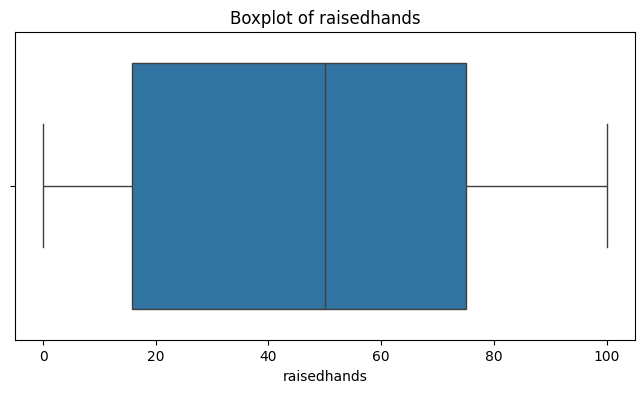

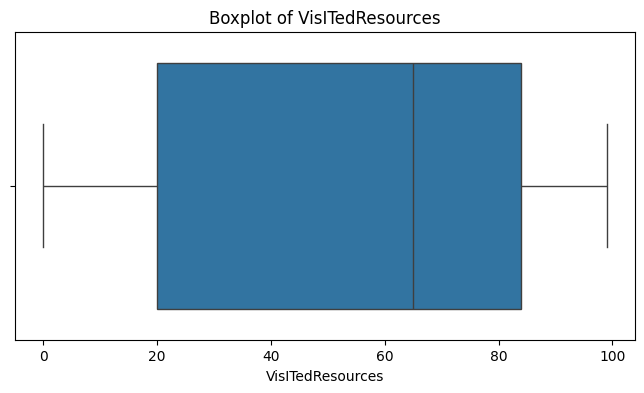

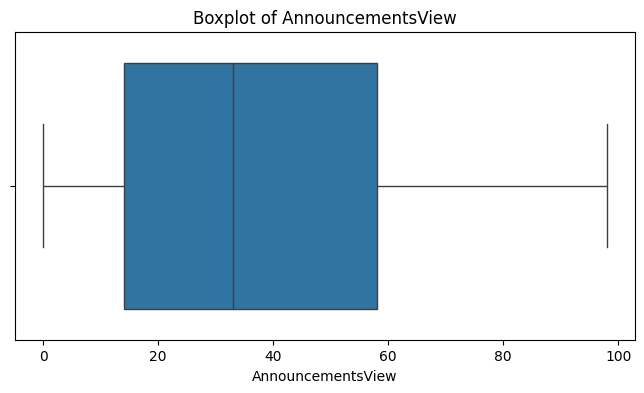

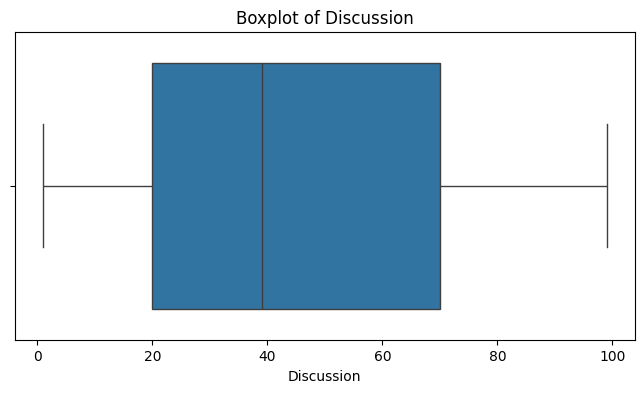

In [11]:
# Visualize boxplots to identify outliers
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

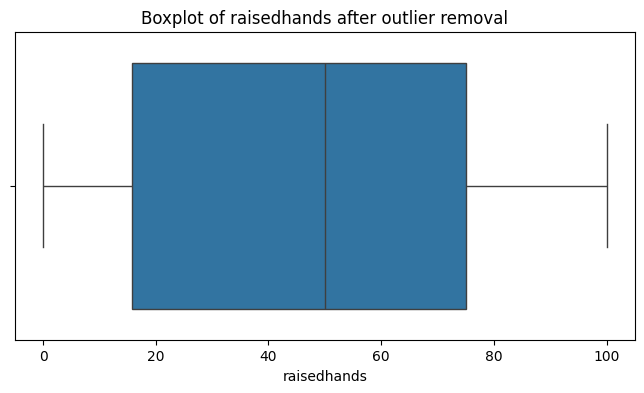

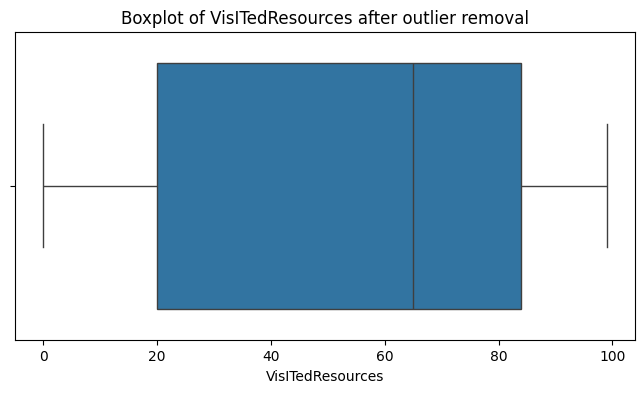

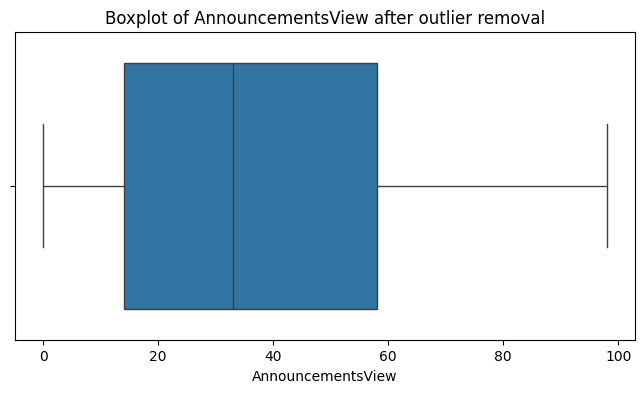

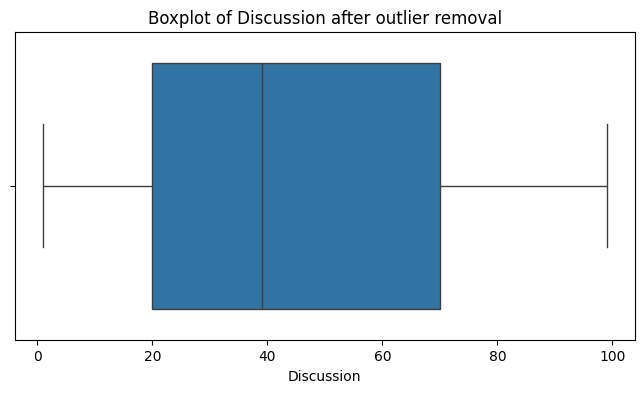

In [13]:
# Identify and handle outliers using z-score method
import numpy as np
def handle_outliers(data, feature):
    z_scores = np.abs(stats.zscore(data[feature]))
    threshold = 3  # Adjust as needed
    outliers = (z_scores > threshold)
    data.loc[outliers, feature] = data[feature].median()  # Replace outliers with median value

# Apply outlier handling to all numeric features
for feature in numeric_features:
    handle_outliers(data, feature)

# Re-plot boxplots after outlier removal
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature} after outlier removal')
    plt.show()
